# Computing Mean, Standard Deviation and Variance Using Pandas

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load data
df = pd.read_csv('datasets/Seed_Data.csv')
df.head()

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [3]:
# selecting columns of interest
df = df[['A', 'LK']]
df.head()

,A,LK
0,15.26,5.763
1,14.88,5.554
2,14.29,5.291
3,13.84,5.324
4,16.14,5.658


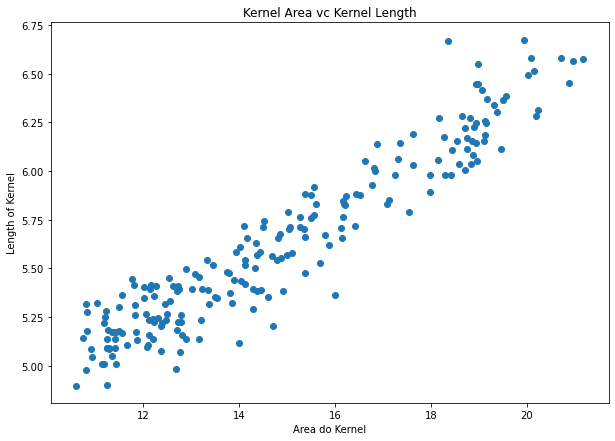

In [4]:
# visualize data
plt.figure(figsize=(10, 7))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
plt.xlabel('Area do Kernel')
plt.ylabel('Length of Kernel')
plt.title('Kernel Area vc Kernel Length')
plt.show()

In [5]:
# calculate the mean using pandas
df.mean()

A     14.847524
LK     5.628533
dtype: float64

In [6]:
# calculate the mean using numpy
np.mean(df, axis=0)

A     14.847524
LK     5.628533
dtype: float64

In [7]:
# compute standard deviation using pandas
df.std()

A     2.909699
LK    0.443063
dtype: float64

In [8]:
# compute standard deviation using numpy
np.std(df, axis=0)

A     2.902763
LK    0.442007
dtype: float64

In [9]:
# compute variance using pandas
df.var()

A     8.466351
LK    0.196305
dtype: float64

In [10]:
# compute variance using numpy
np.var(df, axis=0)

A     8.426035
LK    0.195370
dtype: float64

In [11]:
# compute covariance matrix using pandas
df.cov()

,A,LK
A,8.466351,1.224704
LK,1.224704,0.196305


In [12]:
# compute covariance matrix using numpy
np.cov(df.T)

array([[8.46635078, 1.22470367],
       [1.22470367, 0.19630525]])

# Computing Eigenvalues and Eigenvectors

In [13]:
# using numpy to compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(np.cov(df.T))

In [14]:
# seeing eigenvalues
eigenvalues

array([8.64390408, 0.01875194])

In [15]:
# look at eigenvalues as a percentage of the total variance
eigenvalues = eigenvalues / eigenvalues.max()
eigenvalues

array([1.        , 0.00216938])

In [16]:
# look at eigenvectors
eigenvectors

array([[ 0.98965371, -0.14347657],
       [ 0.14347657,  0.98965371]])

In [17]:
# the principal component was the first eigenvector
eigenvectors[0]

array([ 0.98965371, -0.14347657])

# Manually Executing PCA

In [18]:
# compute covariance matrix
data = np.cov(df.T)
data

array([[8.46635078, 1.22470367],
       [1.22470367, 0.19630525]])

In [19]:
# compute eigenvalues and eigenvectors
eigenvectors, eigenvalues, _ = np.linalg.svd(data, full_matrices=False)

In [20]:
# eigenvalues are returned, sorted from the highest value to the lowest
eigenvalues

array([8.64390408, 0.01875194])

In [21]:
# seeing eigenvectors
eigenvectors

array([[-0.98965371, -0.14347657],
       [-0.14347657,  0.98965371]])

In [22]:
# Compute the eigenvalues as a percentage of the variance
eigenvalues = np.cumsum(eigenvalues)
eigenvalues = eigenvalues / eigenvalues.max()
eigenvalues

array([0.99783531, 1.        ])

We choose to describe the data with at least 75% of the available variance. The principal component comprises 99% of the available variance.

In [23]:
P = eigenvectors[0]
P

array([-0.98965371, -0.14347657])

Now, we can apply the dimensionality reduction process. Execute a matrix multiplication of the principal component with the transpose of the dataset.

Note: The dimensionality reduction process is a matrix multiplication of the selected eigenvectors and the data to be transformed.

In [24]:
# matrix multiplication
x_t_p = df.dot(P)
x_t_p

0     -15.928971
1     -15.522916
2     -14.901286
3     -14.460677
4     -16.784801
         ...    
205   -12.800918
206   -11.851281
207   -13.814672
208   -12.459991
209   -12.924988
Length: 210, dtype: float64

The output of the PCA is a single-column, 210-sample dataset. As such, we have just reduced the size of the initial dataset by half, comprising approximately 99% of the variance within the data.

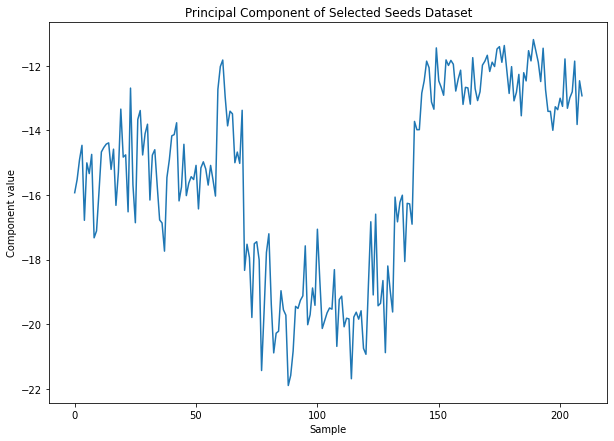

In [25]:
# plot the values of principal component
plt.figure(figsize=(10, 7))
plt.plot(x_t_p)
plt.title('Principal Component of Selected Seeds Dataset')
plt.xlabel('Sample')
plt.ylabel('Component value')
plt.show()

# scikit-learn PCA

In [26]:
# import package
from sklearn.decomposition import PCA

In [27]:
# instantiate the PCA
model = PCA()
model.fit(df.values)

PCA()

In [28]:
# seeing percentage of variance described by the components (eigenvalues)
model.explained_variance_ratio_

array([0.99783531, 0.00216469])

In [29]:
# seeing the eigenvectors
model.components_

array([[ 0.98965371,  0.14347657],
       [-0.14347657,  0.98965371]])

In [30]:
# create a new PCA specifying the number of components
model = PCA(n_components=1)
model.fit(df.values)

PCA(n_components=1)

In [31]:
# seeing eigenvector
model.components_

array([[0.98965371, 0.14347657]])

In [32]:
# transform the Seeds dataset into the lower space
data_t = model.fit_transform(df.values)

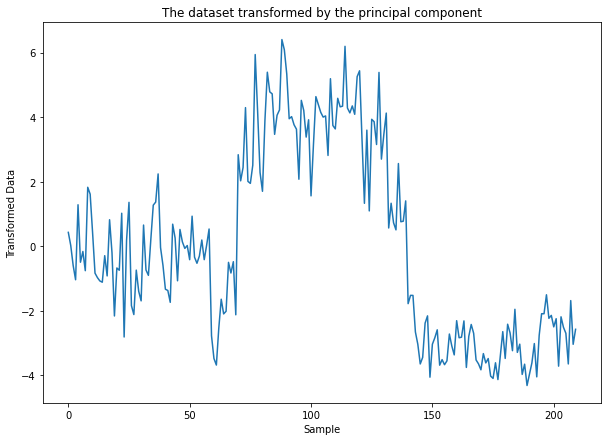

In [33]:
# plot the transformed data
plt.figure(figsize=(10, 7))
plt.plot(data_t)
plt.xlabel('Sample')
plt.ylabel('Transformed Data')
plt.title('The dataset transformed by the principal component')
plt.show()

# Visualizing Variance Reduction with Manual PCA

In [34]:
# load data
df = pd.read_csv('datasets/Seed_Data.csv')
df = df[['A', 'LK']]
df.head()

,A,LK
0,15.26,5.763
1,14.88,5.554
2,14.29,5.291
3,13.84,5.324
4,16.14,5.658


In [35]:
# Compute the means
means = np.mean(df.values, axis=0)
means

array([14.84752381,  5.62853333])

In [36]:
# Center the dataset around zero by subtracting the respective means
df2 = df.values - means
df2

array([[ 4.12476190e-01,  1.34466667e-01],
       [ 3.24761905e-02, -7.45333333e-02],
       [-5.57523810e-01, -3.37533333e-01],
       [-1.00752381e+00, -3.04533333e-01],
       [ 1.29247619e+00,  2.94666667e-02],
       [-4.67523810e-01, -2.42533333e-01],
       [-1.57523810e-01, -6.55333333e-02],
       [-7.37523810e-01, -2.08533333e-01],
       [ 1.78247619e+00,  4.24466667e-01],
       [ 1.59247619e+00,  2.55466667e-01],
       [ 4.12476190e-01,  8.54666667e-02],
       [-8.17523810e-01, -1.90533333e-01],
       [-9.57523810e-01, -1.89533333e-01],
       [-1.06752381e+00, -1.49533333e-01],
       [-1.10752381e+00, -1.46533333e-01],
       [-2.57523810e-01, -2.77533333e-01],
       [-8.57523810e-01, -5.09533333e-01],
       [ 8.42476190e-01, -1.01533333e-01],
       [-1.47523810e-01, -4.23533333e-01],
       [-2.12752381e+00, -4.02533333e-01],
       [-6.87523810e-01,  2.94666667e-02],
       [-7.37523810e-01, -1.08533333e-01],
       [ 1.03247619e+00, -1.05333333e-02],
       [-2.

In [37]:
# compute covariance matrix
data = np.cov(df2.T)

In [38]:
# use manual PCA to transform the data on the basis of the first principal component
eigenvectors, eigenvalues, _ = np.linalg.svd(data, full_matrices=False)

In [39]:
# principal component
P = eigenvectors[0]
P

array([-0.98965371, -0.14347657])

In [40]:
# transform data
data_t = (P.T).dot(df2.T)

In [41]:
# reshape the principal component for later use
P = P.reshape((-1, 1))

To compute the inverse transform of the reduced dataset, we need to restore the selected eigenvectors to the higher-dimensional space. To do this, we will invert the matrix.

In [42]:
P_transformed = np.linalg.pinv(P)
P_transformed

array([[-0.98965371, -0.14347657]])

In [43]:
# Prepare the transformed data for use in the matrix multiplication
data_t = data_t.reshape((-1, 1))

In [44]:
# Compute the inverse transform of the reduced data
data_restored = data_t.dot(P_transformed)
data_restored

array([[ 4.23078358e-01,  6.13364376e-02],
       [ 2.12245047e-02,  3.07705530e-03],
       [-5.93973963e-01, -8.61122915e-02],
       [-1.03002474e+00, -1.49329425e-01],
       [ 1.27005392e+00,  1.84128026e-01],
       [-4.92337409e-01, -7.13773752e-02],
       [-1.63586316e-01, -2.37161785e-02],
       [-7.51951584e-01, -1.09015341e-01],
       [ 1.80605390e+00,  2.61835450e-01],
       [ 1.59596848e+00,  2.31377993e-01],
       [ 4.16120744e-01,  6.03277467e-02],
       [-8.27748884e-01, -1.20004171e-01],
       [-9.64724918e-01, -1.39862483e-01],
       [-1.06678082e+00, -1.54658196e-01],
       [-1.10553143e+00, -1.60276124e-01],
       [-2.91630094e-01, -4.22795227e-02],
       [-9.12220950e-01, -1.32250639e-01],
       [ 8.10716440e-01,  1.17534866e-01],
       [-2.04625352e-01, -2.96658760e-02],
       [-2.14088417e+00, -3.10377985e-01],
       [-6.69186735e-01, -9.70163791e-02],
       [-7.37752372e-01, -1.06956788e-01],
       [ 1.00972647e+00,  1.46386653e-01],
       [-2.

In [45]:
data_restored = data_restored + means

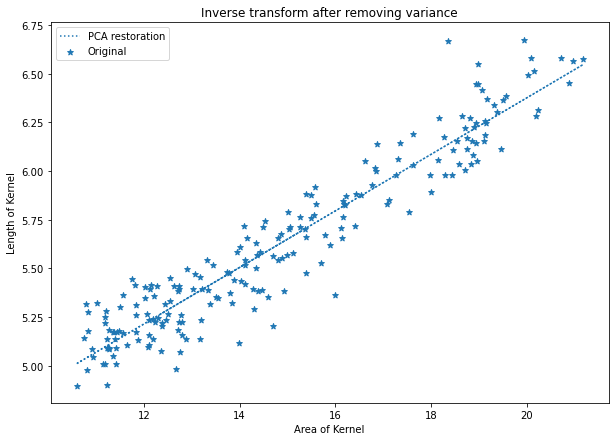

In [46]:
# plot the result to visualize the effect of removing the variance from the data
plt.figure(figsize=(10, 7))
plt.plot(data_restored[:,0], data_restored[:,1], linestyle=':', label='PCA restoration')
plt.scatter(df['A'], df['LK'], marker='*', label='Original')
plt.legend()
plt.xlabel('Area of Kernel')
plt.ylabel('Length of Kernel')
plt.title('Inverse transform after removing variance')
plt.show()

In [47]:
# transform the data into the lower-dimensional space, but this time, use all of the eigenvectors
P = eigenvectors
data_transformed = P.dot(df2.T)

In [48]:
# Transpose data_transformed to put it in the correct shape for matrix multiplication
data_transformed = data_transformed.T

In [49]:
# restore the data back to the higher-dimensional space
data_restored = data_transformed.dot(P)
data_restored

array([[ 4.12476190e-01,  1.34466667e-01],
       [ 3.24761905e-02, -7.45333333e-02],
       [-5.57523810e-01, -3.37533333e-01],
       [-1.00752381e+00, -3.04533333e-01],
       [ 1.29247619e+00,  2.94666667e-02],
       [-4.67523810e-01, -2.42533333e-01],
       [-1.57523810e-01, -6.55333333e-02],
       [-7.37523810e-01, -2.08533333e-01],
       [ 1.78247619e+00,  4.24466667e-01],
       [ 1.59247619e+00,  2.55466667e-01],
       [ 4.12476190e-01,  8.54666667e-02],
       [-8.17523810e-01, -1.90533333e-01],
       [-9.57523810e-01, -1.89533333e-01],
       [-1.06752381e+00, -1.49533333e-01],
       [-1.10752381e+00, -1.46533333e-01],
       [-2.57523810e-01, -2.77533333e-01],
       [-8.57523810e-01, -5.09533333e-01],
       [ 8.42476190e-01, -1.01533333e-01],
       [-1.47523810e-01, -4.23533333e-01],
       [-2.12752381e+00, -4.02533333e-01],
       [-6.87523810e-01,  2.94666667e-02],
       [-7.37523810e-01, -1.08533333e-01],
       [ 1.03247619e+00, -1.05333333e-02],
       [-2.

In [50]:
# Add the means back to the restored data
data_restored = data_restored + means

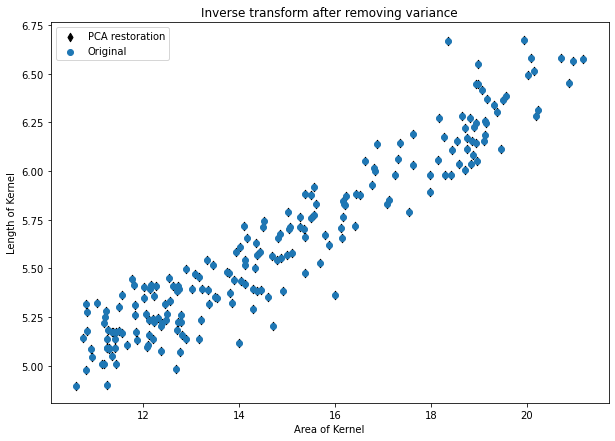

In [51]:
# Visualize the restored data in the context of the original dataset
plt.figure(figsize=(10, 7))
plt.scatter(data_restored[:,0], data_restored[:,1], marker='d', label='PCA restoration', c='k')
plt.scatter(df['A'], df['LK'], marker='o', label='Original', c='#1f77b4')
plt.legend()
plt.xlabel('Area of Kernel')
plt.ylabel('Length of Kernel')
plt.title('Inverse transform after removing variance')
plt.show()

# Visualizing Variance Reduction with scikit-learn

In [52]:
# Use the scikit-learn API to transform the data on the basis of the first principal component
model = PCA(n_components=1)
data_p = model.fit_transform(df.values)

In [53]:
# Compute the inverse transform of the reduced data
data = model.inverse_transform(data_p)

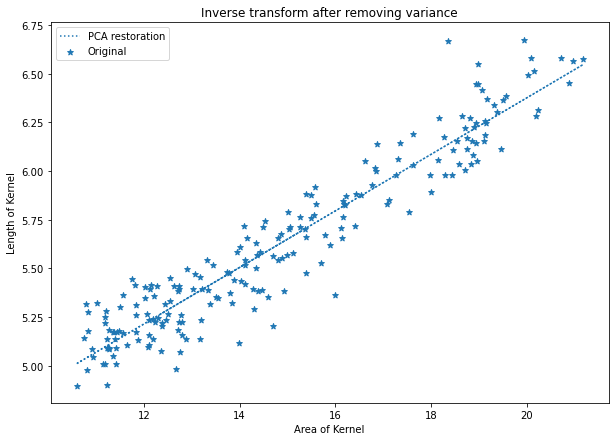

In [54]:
#  plot the result to visualize the effect of removing the variance from the data
plt.figure(figsize=(10, 7))
plt.plot(data[:,0], data[:,1], linestyle=':', label='PCA restoration')
plt.scatter(df['A'], df['LK'], marker='*', label='Original')
plt.legend()
plt.xlabel('Area of Kernel')
plt.ylabel('Length of Kernel')
plt.title('Inverse transform after removing variance')
plt.show()

In [55]:
# computing the inverse transform and seeing how the results change without removing any components
model = PCA()
data_p = model.fit_transform(df.values)
data = model.inverse_transform(data_p)

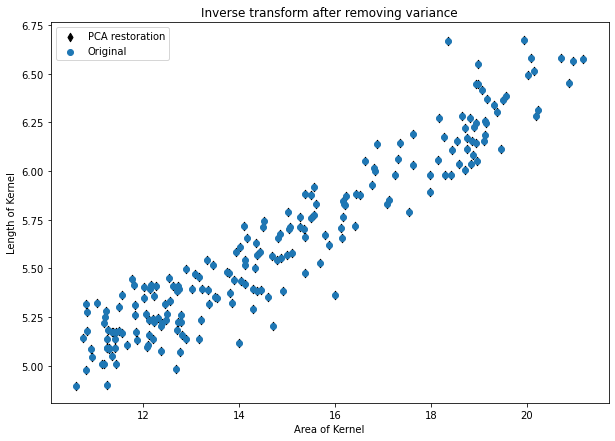

In [56]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], marker='d', label='PCA restoration', c='k')
plt.scatter(df['A'], df['LK'], marker='o', label='Original', c='#1f77b4')
plt.legend()
plt.xlabel('Area of Kernel')
plt.ylabel('Length of Kernel')
plt.title('Inverse transform after removing variance')
plt.show()

# Plotting 3D Plots in Matplotlib

In [57]:
# import package
from mpl_toolkits.mplot3d import Axes3D

In [58]:
# load data
df = pd.read_csv('datasets/Seed_Data.csv')
df = df[['A', 'LK', 'C']]
df.head()

,A,LK,C
0,15.26,5.763,0.8710
1,14.88,5.554,0.8811
2,14.29,5.291,0.9050
3,13.84,5.324,0.8955
4,16.14,5.658,0.9034


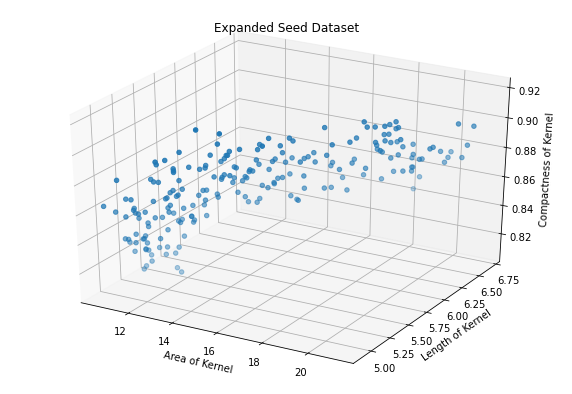

In [59]:
# Plot the data in three dimensions
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['A'], df['LK'], df['C'])
ax.set_xlabel('Area of Kernel')
ax.set_ylabel('Length of Kernel')
ax.set_zlabel('Compactness of Kernel')
ax.set_title('Expanded Seed Dataset')
plt.show()

<b> Note: </b> While the <b> Axes3D </b> library was imported but not directly used, it is required for configuring the plot window in three dimensions. If the import of <b>Axes3D</b> was omitted, the <b>projection='3d'</b> argument would return an AttributeError exception.